In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')


# Reading the data from the CSV Format

In [20]:
df=pd.read_csv('Desktop\MAll seg\Mall_Customers.csv')

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#statical Info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
#DataType Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

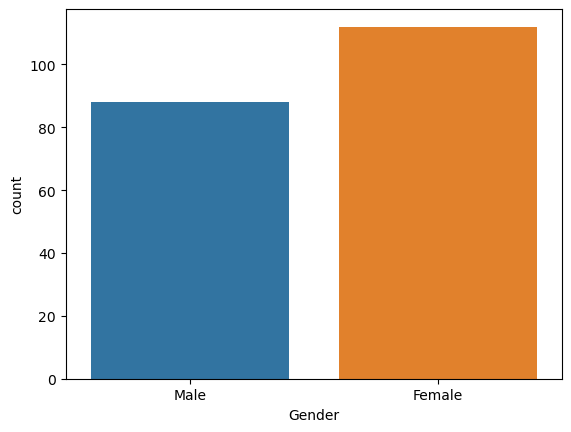

In [26]:
sns.countplot(x='Gender',data= df)

<Axes: xlabel='Age', ylabel='Density'>

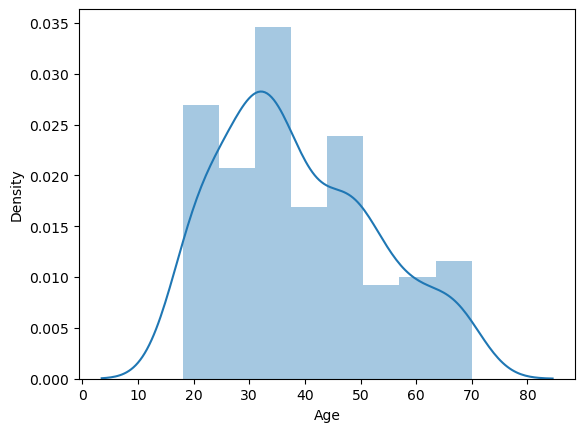

In [27]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

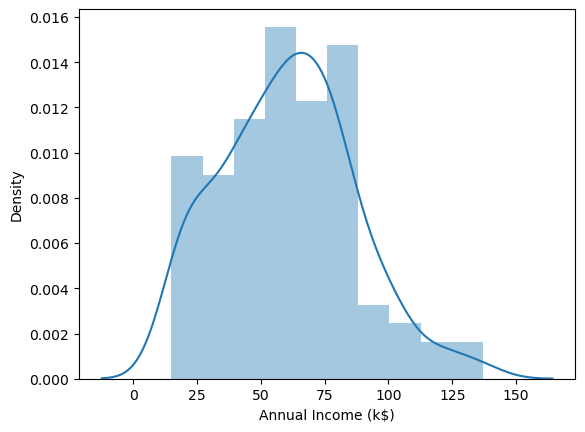

In [28]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

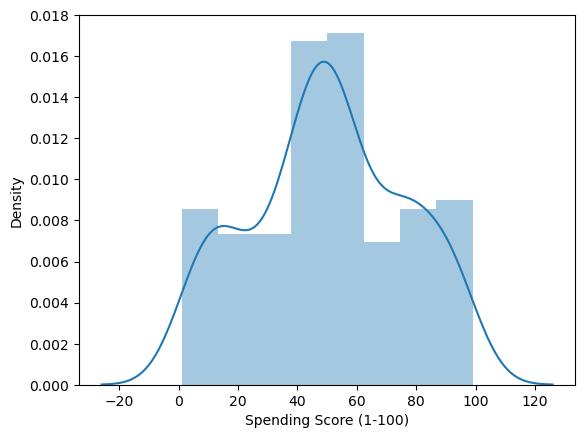

In [29]:
sns.distplot(df['Spending Score (1-100)'])

In [31]:
corr= df.corr()
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

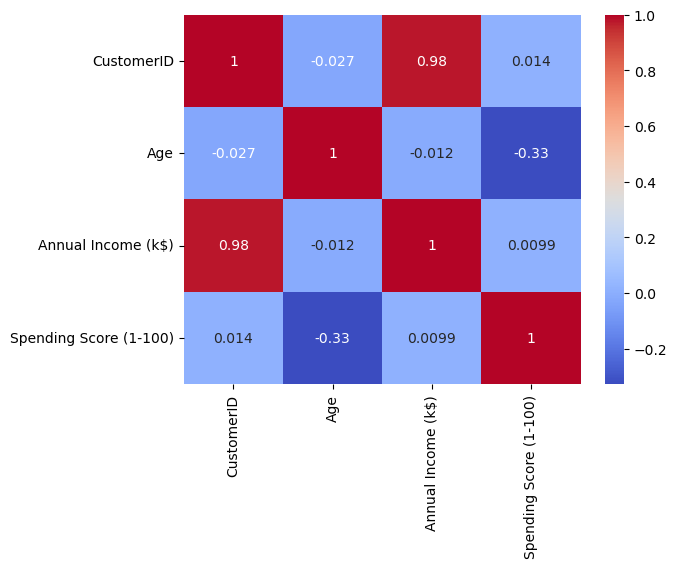

In [34]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [51]:
# clustur on the second feature
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

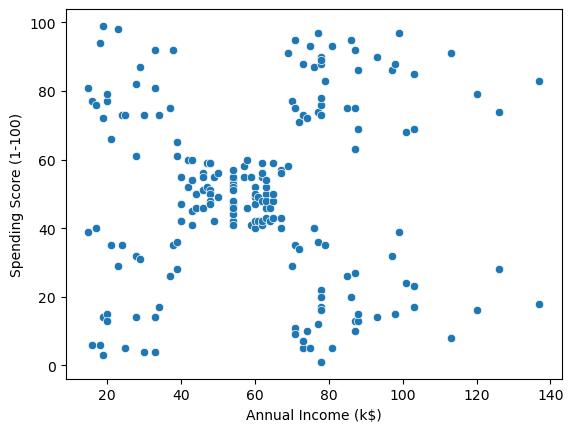

In [53]:
# scatter plot

sns.scatterplot(data=df1, x="Annual Income (k$)", y="Spending Score (1-100)")

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1)
    wcss.append(km.inertia_)

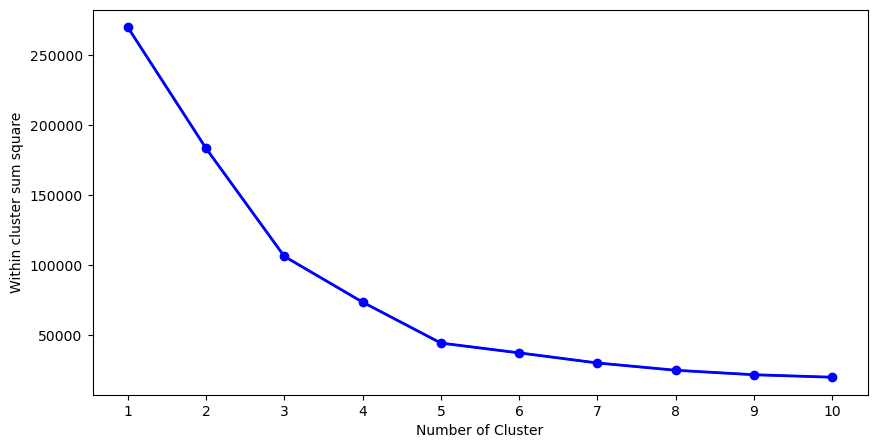

In [80]:
# elbow method to find the number of clusterings
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='Blue', marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Within cluster sum square')
plt.xticks(np.arange(1,11,1))
plt.show()


In [86]:
km=KMeans(n_clusters=5)
km.fit(df1)
#predecting the Clusters for Dataframe1
y=km.predict(df1)
#creating a column named Label (This column contains the cluster labels assigned by the K-Means model )
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

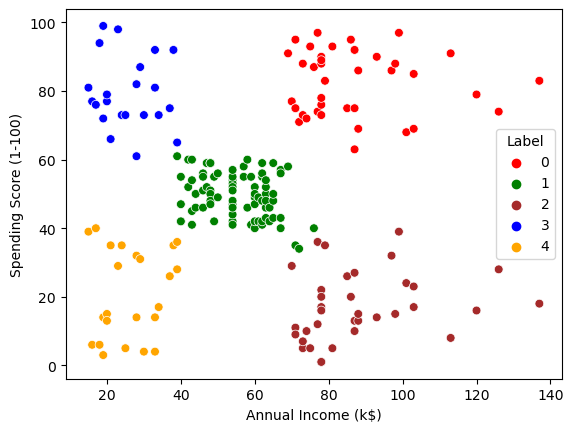

In [91]:
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label', palette = ['red', 'green', 'brown', 'blue', 'orange'],s =40
)

In [94]:
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [97]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df2)
    wcss.append(km.inertia_)
    

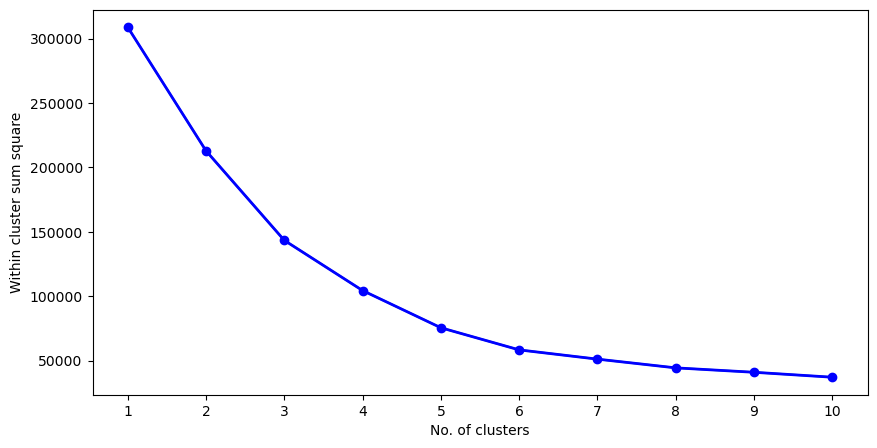

In [99]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='Blue', marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster sum square')
plt.xticks(np.arange(1,11,1))
plt.show()

In [100]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,0
1,15,81,21,4
2,16,6,20,0
3,16,77,23,4
4,17,40,31,0


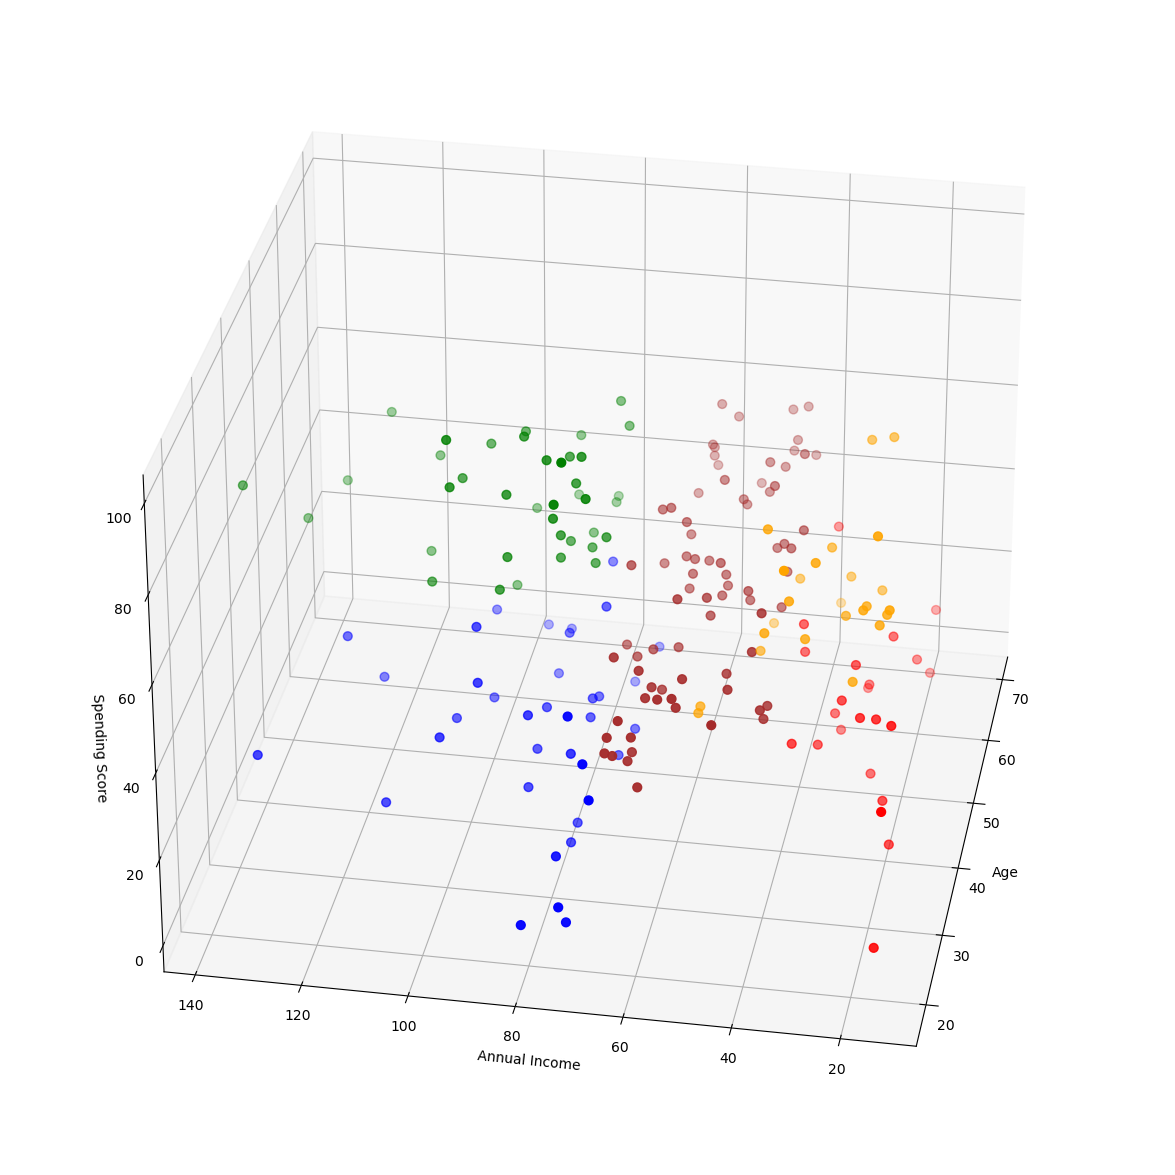

In [111]:
fig=plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0], c='Red',s=40)
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1], c='Green',s=40)
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2], c='Blue',s=40)
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3], c='Brown',s=40)
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4], c='Orange',s=40)

ax.view_init(30,190)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()


# This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall

There are clearly five segments of Customers namely (0: Careful Customers; 1:
Target Customers; 2: General Customers; 3: Miser Customers; 4: Squandered
Customers) based on their Age, Annual Income and Spending Score which are
reportedly the best factors to determine the segments of a customer in a Mall.
Specifically,


○ 0: Careful Customers are customers that have low Annual Income and spend a
few for mall shopping, and the age of them can range from 20 to 70.

○ 1: Target Customers are customers that spend more than 70k$ Income for
shopping and spending scores of them reach above 60. The age of them is
around 25-40.

○ 2: General Customers are the customers that are popular in the mall and they
account for the large quantity. They spend about 40-70k$ income for shopping
and their spending score is in the range 40-60(medium). The age of this kind
of customer ranges from 20-70.

○ 3: Miser Customers are the customers that have high annual income but spend
a low spending score for shopping. The age of them ranges from 20 to 60.

○ 4: Squandered Customers are the customers that have low annual income but
spend too much for spending scores. The age of them is around 20-40.